In [2]:
%load_ext autoreload
%autoreload 2
import sys 
sys.path.append('../src/')

In [3]:
import matplotlib.pyplot as plt
import torch

from dasbm.data import Prior

In [24]:
alpha = 0.1
num_categories = 5
num_timesteps = 10

prior = Prior(alpha, num_categories, num_timesteps, prior_type='random_neighbour')
x_start = torch.nn.functional.one_hot(torch.tensor([3 ,2]))
t = torch.tensor([4, 9])
prior.sample(x_start, t)

tensor([[[ 1.0350,  1.0909, -0.3515, -0.3694,  2.0909],
         [ 2.4520, -0.2935,  0.7685,  0.3370,  0.9297],
         [-0.9076, -0.9068,  1.8865, -0.8342, -0.3417],
         [ 0.4629,  1.4889, -0.3732, -1.9329, -0.1508]],

        [[ 0.2277,  0.5295, -0.1084, -0.5178, -0.8638],
         [ 2.2175,  0.8262,  0.3198, -0.9806,  0.7959],
         [ 0.9408,  0.1080,  5.9462,  0.6398, -0.5340],
         [ 2.3502,  0.2316,  2.6822,  1.6231,  2.7171]]])
tensor([[0, 0, 0, 1],
        [0, 0, 1, 0]])


tensor([[0, 0, 0, 1],
        [0, 0, 2, 0]])

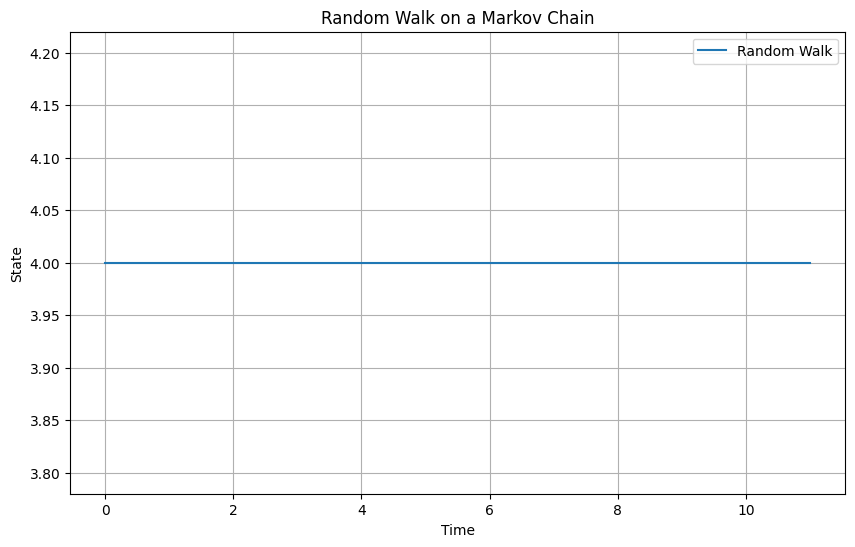

In [25]:
x_0 = 4

trajectory = []
trajectory.append(x_0)
for timestep in range(num_timesteps):
    x_t = trajectory[timestep]
    x_tp1 = random.multinomial(1, trans_probs[x_t]).argmax()
    trajectory.append(x_tp1)
trajectory = np.array(trajectory)
plot_trajectory(trajectory)

In [26]:
trans_probs_pows = [linalg.matrix_power(trans_probs, pow) for pow in range(1, num_timesteps + 1)]
trans_probs_pows[0]

array([[0.9  , 0.025, 0.025, 0.025, 0.025],
       [0.025, 0.9  , 0.025, 0.025, 0.025],
       [0.025, 0.025, 0.9  , 0.025, 0.025],
       [0.025, 0.025, 0.025, 0.9  , 0.025],
       [0.025, 0.025, 0.025, 0.025, 0.9  ]])

[0.02372503 0.07472378 0.02372503 0.02372503 0.85410112]
[0.02346459 0.08488104 0.02346459 0.02346459 0.8447252 ]
[0.02313042 0.09791356 0.02313042 0.02313042 0.83269517]
[0.02269064 0.11506514 0.02269064 0.02269064 0.81686295]
[0.00435652 0.9825739  0.00435652 0.00435652 0.00435652]
[0.00339014 0.98643946 0.00339014 0.00339014 0.00339014]
[0.00246715 0.99013139 0.00246715 0.00246715 0.00246715]
[0.00159236 0.99363057 0.00159236 0.00159236 0.00159236]
[7.69230769e-04 9.96923077e-01 7.69230769e-04 7.69230769e-04
 7.69230769e-04]
[0.00409402 0.41046046 0.00409402 0.00409402 0.00409402]


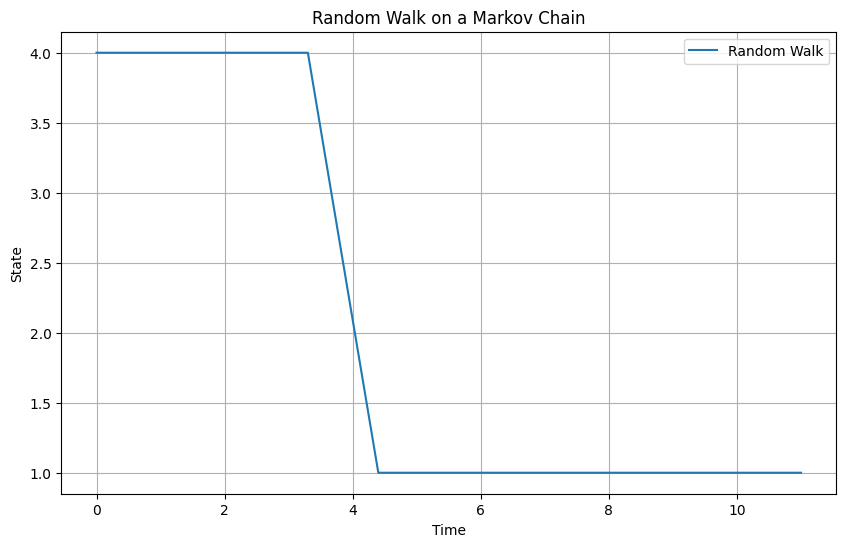

In [29]:
x_0 = 4
x_1 = 1

trajectory = []
trajectory.append(x_0)

for timestep in range(num_timesteps):
    x_t = trajectory[timestep]
    prob_1_t = trans_probs_pows[num_timesteps - timestep - 1][x_t, x_1]  # Scalar
    prob_tp1_t = trans_probs_pows[0][x_t, :]  # Vector of probabilities for all possible x_tp1
    prob_1_tp1 = trans_probs_pows[num_timesteps - timestep - 2][:, x_1]  # Vector of probabilities for all possible x_tp1
    log_probs = np.log(prob_tp1_t) + np.log(prob_1_tp1) - np.log(prob_1_t)
    probs = np.exp(log_probs)
    print(probs)
    x_tp1 = random.multinomial(1, probs).argmax()
    trajectory.append(x_tp1)
trajectory = np.stack(trajectory, axis=0)
plot_trajectory(trajectory)

In [6]:
import torch
import torch.nn.functional as F
logits = torch.randn(2, 3)
# Sample soft categorical using reparametrization trick:
F.gumbel_softmax(logits, tau=1, hard=False)
# Sample hard categorical using "Straight-through" trick:
F.gumbel_softmax(logits, tau=1, hard=True)

tensor([[1., 0., 0.],
        [0., 1., 0.]])